This data contains all the imports and exports of Pakistan. This is a visualized comparison of the trade over the years from 2015 to 2019. The data was collected from www.pbs.gov.pk -- the official website of Beauru of Statistics Pakistan.

# Importing all required libraries and reading in data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.graph_objs as go
import plotly
%matplotlib inline
import warnings  # to ignore warnings

warnings.filterwarnings('ignore')
import os


In [ ]:
# Reading the import and export data in

imp_path = r'../input/import-and-export-data-of-pakistan/Stripped imports.csv'
exp_path = r'../input/import-and-export-data-of-pakistan/Stripped exports.csv'

imp_df = pd.read_csv(imp_path)
exp_df = pd.read_csv(exp_path)


### Some Random Statistics

In [ ]:
# Import and Export with No. of countries and different commodities

print('Pakistan is importing from',len(imp_df['Country'].unique()),'different countries.')
print('Pakistan is exportting to',len(exp_df['Country'].unique()),'different countries.')

print('Pakistan is importing',len(imp_df['Commodity'].unique()),'different items.')
print('Pakistan is exporting',len(exp_df['Commodity'].unique()),'different items.')

In [ ]:
# Looking for most popular commodities and countries in exports

df = pd.DataFrame(exp_df['Country'].value_counts())
df2 = pd.DataFrame(exp_df['Commodity'].value_counts())
print(df.head(5))
df2.head(5)

In [ ]:
# Yearwise imports and exports plus Total Trade Deficit

df = imp_df.groupby(['Year']).agg(Value = ('Value','sum'))
df2 = exp_df.groupby(['Year']).agg(Value= ('Value','sum'))

pd.set_option('float_format','{:.0f}'.format)#To change from scientific notation to see the entire number--.f->decimals

df['Deficit'] = df2.Value - df.Value
print(df['Value'])
print(df2)
print(df['Deficit'])

## Imports, Exports and Total Trade Deficit

In [ ]:
#Plotting Yearwise imports & exports, Deficit in addition

t1 = go.Bar( x = df.index, 
                 y =df.Value, 
                 name = 'Import',
                 marker = dict(color='rgba(0,10,170,1)', 
                 line = dict(color='rgb(0,0,0)', width = 1.5)),
                 text = df.Value
               )

t2 = go.Bar(x = df2.index,
                y = df2.Value,
                name = 'Export',
                marker = dict(color = 'rgba(1,200,10,1)',
                line = dict(color = 'rgb(0,0,0)',
                width = 1.5)),
                text = df2.Value)

t3 = go.Bar(x = df.index,
                y = df.Deficit,
                name = 'Trade Deficit',
                marker = dict(color = 'rgba(220,10,10,1)',
                line = dict(color = 'rgb(0,0,0)',
                width = 1.5)),
                text = df.Deficit)

data = [t1, t2, t3]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data=data, layout = layout)
fig.update_layout(title = go.layout.Title(text = 'Import, Export and Defecit (Yearwise) X 10',
                                            xref = 'paper',
                                            x = 0),
                 xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(
                                                                        text = 'Year',
                                                                        font = dict
                                                                        (
                                                                            family = 'Courier New, monospace',
                                                                            size = 18,
                                                                            color = '#7f7f7f'
                                                                        )
                                                                      )
                                        ),
                 yaxis = go.layout.YAxis(
                                             title = go.layout.yaxis.Title
                                             (
                                             text = 'Value',
                                             font = dict
                                                     (
                                                         family = 'Courier New, monospace',
                                                         size = 18,
                                                         color = '#7f7f7f'
                                                     )
                                             )
                                        )
                 )
fig.show()

## Top countries of Pakistan's Imports and Exports

In [ ]:
# Countrywise imports and exports

df3 = imp_df.groupby(['Country']).agg(Value = ('Value','sum'))
df3 = df3.sort_values(by='Value', ascending = False)
df3 = df3[:10]

df4 = exp_df.groupby(['Country']).agg(Value = ('Value','sum'))
df4 = df4.sort_values(by = 'Value', ascending = False)
df4 = df4[:10]

sns.set(rc={'figure.figsize':(15,6)})
axis1 = plt.subplot(121)

sns.barplot(df3.Value, df3.index).set_title('Countrywie Import')

axis2 = plt.subplot(122)
sns.barplot(df4.Value, df4.index).set_title('Countrywise Export')

plt.tight_layout()
plt.show()

## Rise and Fall of Imports and Exports over the years

In [ ]:
# Comparisonn of Import and Export

fig = go.Figure()

fig.add_trace(go.Scatter(
                         x=df.index, y= df.Value, 
                         name = 'Import', mode = 'lines+markers',
                          marker = dict(size=8),
                         line = dict(color = 'crimson', width = 1)))

fig.add_trace(go.Scatter(
                        x=df2.index, y=df2.Value, 
                        name = 'Export', mode = 'lines+markers',
                        line = dict(color='blue', width = 1)))

fig.update_layout(title = go.layout.Title(
                        text = 'Yearwise Import/Export',
                        xref = 'paper', 
                        x= 0),
                  xaxis = go.layout.XAxis
                    (
                      title = go.layout.xaxis.Title
                      (
                          text = 'Year',
                          font = dict
                          (
                                      family = 'Courier New, monospace',
                                      size = 18,
                                      color = '#7f7f7f'
                          )
                      )
                  ),
                  yaxis = go.layout.YAxis(
                          title = go.layout.yaxis.Title(
                              text = 'Value',
                              font = dict(
                                          family = 'Courier New, monospace',
                                          size = 18,
                                          color = '#7f7f7f'
                              )
                          )
                      )
                 )
fig.show()

## Top Import and Export Commodities of Pakistan

In [ ]:
# Commoditywise imports and export

df = imp_df.groupby(['Commodity']).agg(Value=('Value','sum'))
df = df.sort_values(by='Value', ascending = False)
df = df[:10]

df2 = exp_df.groupby(['Commodity']).agg(Value=('Value','sum'))
df2 = df2.sort_values(by='Value', ascending=False)
df2 = df2[:10]

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(df.Value, df.index).set_title('Commodity Wise Imports')
plt.show()

sns.barplot(df2.Value, df2.index).set_title('Commodity Wise Exports')
plt.show()

## Values/Expensive Import and Export Commodities

In [ ]:
# Lets look into some expensive good imports and exports
expensive_imports = imp_df[imp_df.Value>100000000]
# expensive_imports.head(10)

expensive_exports = exp_df[exp_df.Value>10000000]
# expensive_exports.head(10)

In [ ]:


df = expensive_imports.groupby(['HSCode']).agg(Value=('Value','sum'))

value = np.array(df)
commodityCode = expensive_imports.Commodity
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0,6.0)
squarify.plot(sizes = value, label=commodityCode, alpha=1.0)
plt.axis('off')
plt.title('Expensive IMports HSCode')
plt.show()

In [ ]:
# Contrywise exploration of expensive data
df1 = expensive_imports.groupby(['Country']).agg(Value = ('Value', 'sum'))
df1 = df1.sort_values(by = 'Value')

value = np.array(df1)
country = expensive_imports['Country']
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes = value, label = country, alpha=0.9)
plt.title('Country wise expensive Imports')
plt.axis('off')
plt.show()

## Choropleth Representation
This will generate a .html file in the directory, so it won't be visible here.

In [ ]:
# Choropleth representation of value with countries
eighteen = imp_df.loc[imp_df['Year'] == 2018]
data = eighteen.groupby('Country')['Value'].sum().reset_index()


data = [dict(type= 'choropleth',
            locations = data['Country'],
            locationmode = 'country names',
            z = data['Value'],
            colorscale = 'Portland',#[[0,'rgb(255,0,0)'],[1,'rgb(255,255,255)']],#'Jet',#'Portland','Rainbow', 'Jet','Blues','Reds'
            reversescale = False,
            marker = dict(
                          line = dict(color = 'rgb(0,0,0)',
                          width = 0.1)),
            colorbar = dict(title = 'Cost in Rs'),
            )]

layout = dict(title = 'Imports in 2018'.title(),
             geo = dict(
             showframe = False, 
             showcoastlines = True, 
             projection = dict(type='orthographic'))) # equirectangular, orthographic, natural earth
#              projection = dict(type='equirectangular')))#orthographic

fig = dict(data=data, layout = layout)
plotly.offline.plot(fig, filename='Imports of Pakistan.html')
# fig.show()

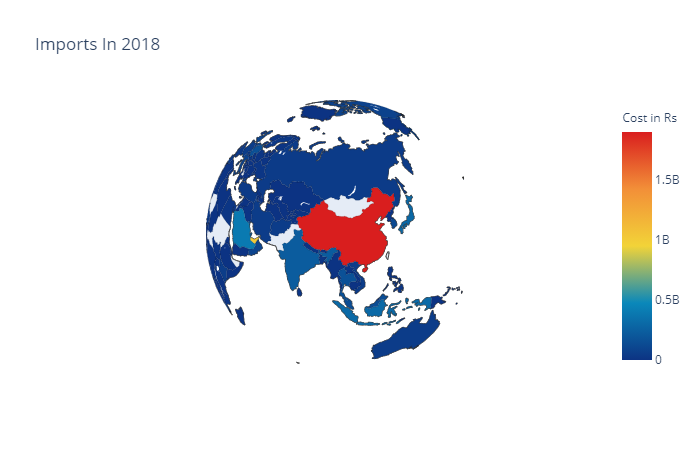

## Treemap Representation of Exports

In [ ]:
# Graph objects Tree map representation of exports in 2018

dat2 = exp_df.loc[exp_df['Year'] == 2018]
data = dat2.groupby('Country')['Value'].sum().reset_index()
data['Parents'] = ''
fig = go.Figure(go.Treemap(
    labels = data['Country'],
    parents = data['Parents'],
    values = data['Value'],
    marker_colorscale = 'Rainbow'  #[[0,'rgb(255, 255, 255)'],[1,'rgb(200, 0, 2)']]
))
fig.show()

## On Pie Chart Representation

In [ ]:
plot = plt.pie(imp_df[imp_df['Year'] == 2018]['Value'].sort_values(ascending=False)[0:15], 
              labels=imp_df[imp_df['Year']==2018].sort_values(by='Value', ascending = False)
              ['Commodity'][0:15], autopct='%1.1f%%')
plt.title('Major Imports of Pakistan')
plt.show()

# Note: 
    The data I used in this notebook is the data from 2015-2019, but the available data on www.pbs.gov.pk is from 1991 to 2019. I did not use all the data because the the years prior to 2015 were in .pdf format and cleaning that data was not possible with free available resources. So, I did not use them conviniently. If anyone has the data prior to 2015 in .CSV , .TXT or any other file format, contact me. I would love to work, modify and improve this notebook. 
    Thanks. 
    
    Contact Info:
    idrees3072@yahoo.com

# Thanks for sticking around